### Exploratory Data Analysis (EDA).

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
sns.set(style='whitegrid') 
plt.style.use('ggplot')    
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings for cleaner output

In [2]:
train_data = pd.read_csv(r'C:\Users\abhis\OneDrive\Desktop\Loan approval\loan approval dataset\train_u6lujuX_CVtuZ9i.csv')
test_data = pd.read_csv(r'C:\Users\abhis\OneDrive\Desktop\Loan approval\loan approval dataset\test_Y3wMUE5_7gLdaTN.csv')

In [3]:
print("Training Data Sample:")
print(train_data.head())

Training Data Sample:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N 

In [4]:
print("Test Data Sample:")
print(test_data.head())

Test Data Sample:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3   

####  Check Dataset Information and Missing Values

In [5]:
print("Training Data Info:")
print(train_data.info())
print("Missing Values in Training Data:")
print(train_data.isnull().sum())
print("Statistical Summary of Training Data:")
print(train_data.describe())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
Missing Values in Training Data:
Loan_ID               0
Gender               13
Marrie

#### Explore the Target Variable - Loan Status

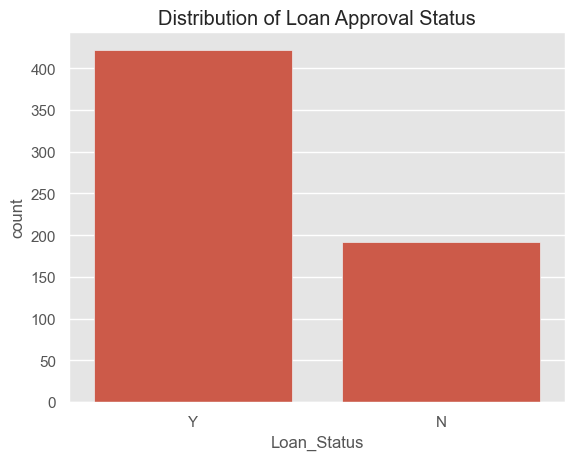

In [6]:
sns.countplot(x='Loan_Status', data=train_data)
plt.title('Distribution of Loan Approval Status')
plt.show()

In [7]:
loan_status_counts = train_data['Loan_Status'].value_counts(normalize=True) * 100
print(f"Loan Approval Status Distribution (in %):\n{loan_status_counts}")

Loan Approval Status Distribution (in %):
Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64


#### Separate categorical and numerical columns

In [8]:
categorical_cols = train_data.select_dtypes(include=['object']).columns
numerical_cols = train_data.select_dtypes(include=[np.number]).columns

print("Categorical Columns:")
print(categorical_cols)

print("Numerical Columns:")
print(numerical_cols)

Categorical Columns:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')
Numerical Columns:
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


creating histograms and box plots for numerical features such as ApplicantIncome, CoapplicantIncome, and LoanAmount.

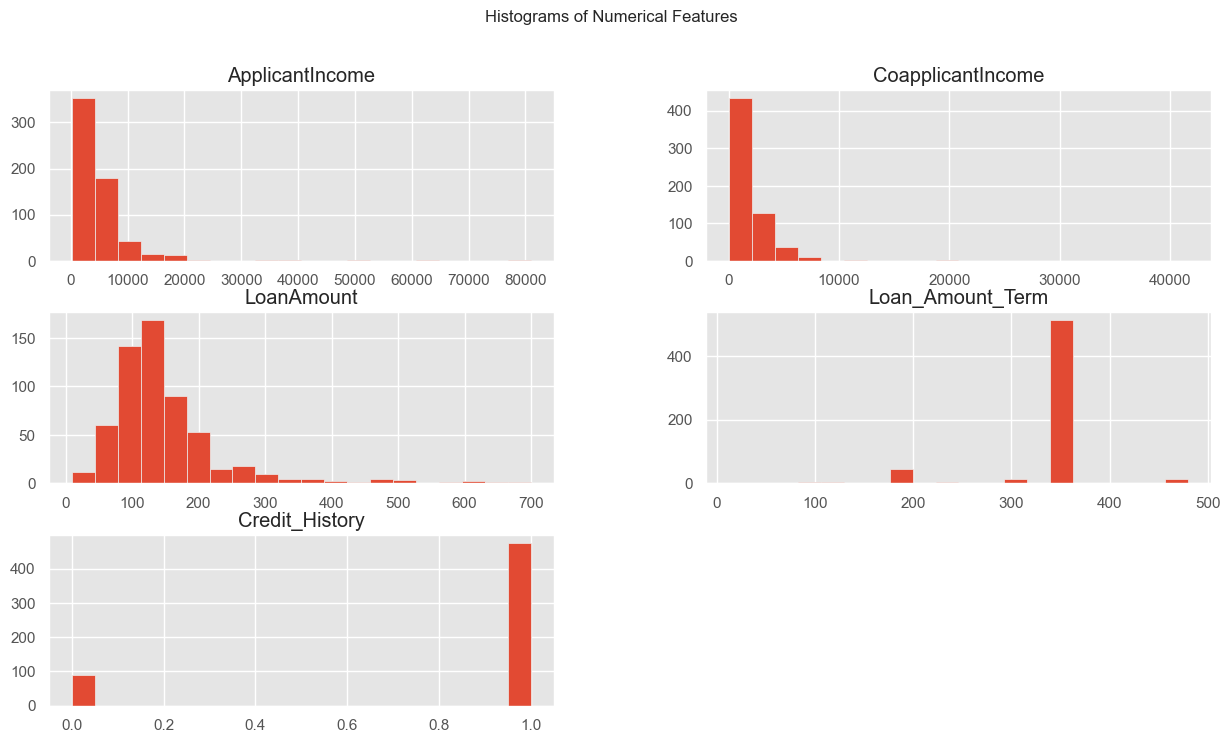

In [9]:
train_data[numerical_cols].hist(bins=20, figsize=(15, 8))
plt.suptitle("Histograms of Numerical Features")
plt.show()

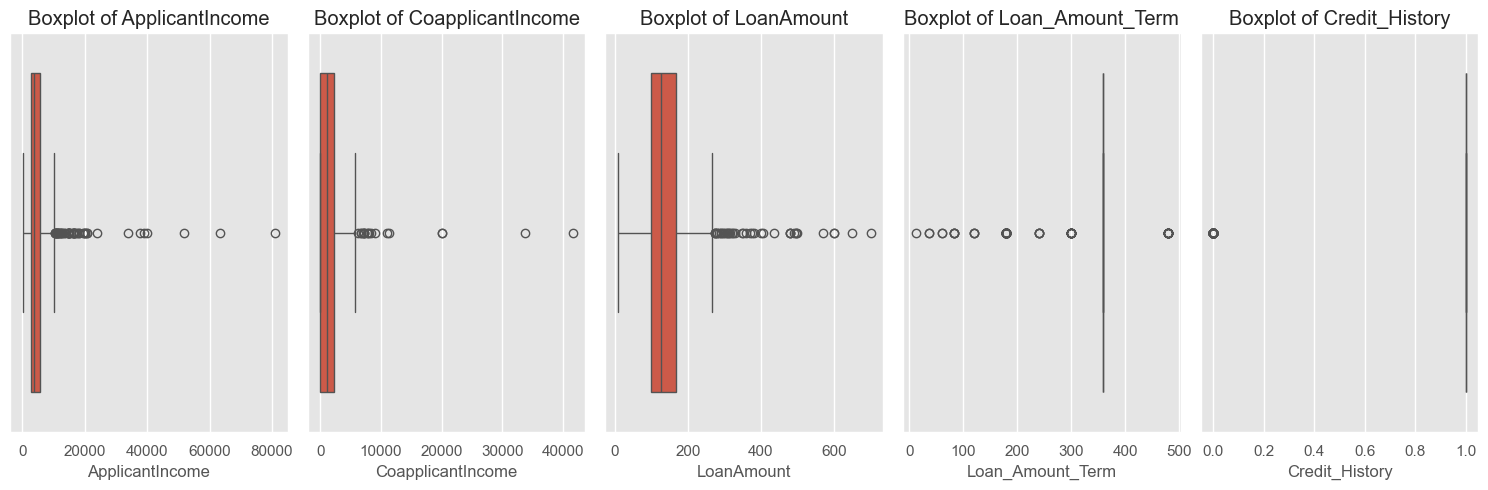

In [10]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    sns.boxplot(x=train_data[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

visualizing how categorical features influence the target variable (Loan_Status). This will help us see which categories are more likely to get loans approved.

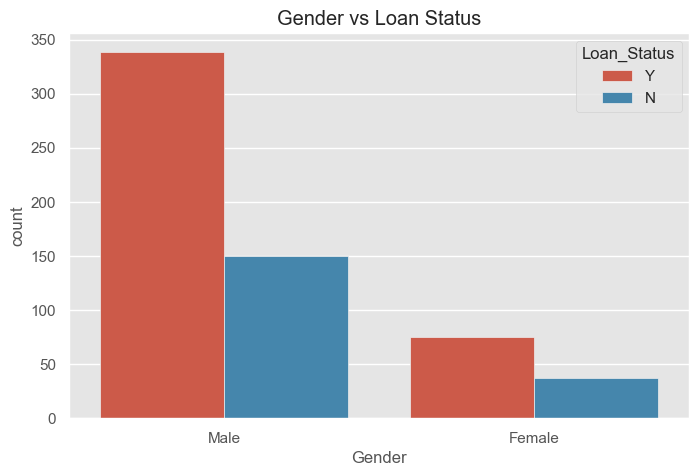

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Loan_Status', data=train_data)
plt.title("Gender vs Loan Status")
plt.show()

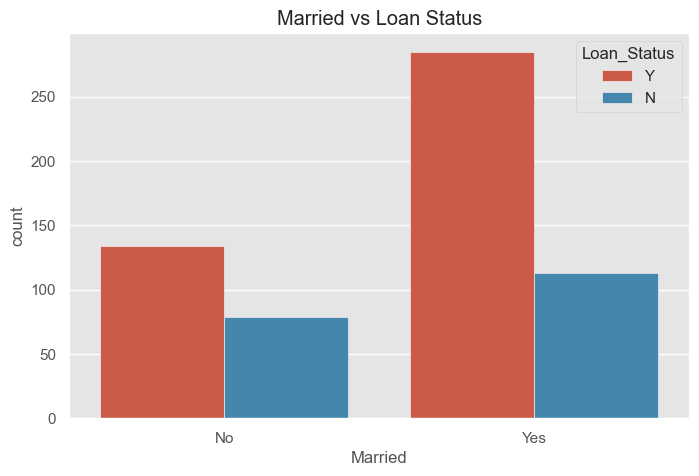

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Married', hue='Loan_Status', data=train_data)
plt.title("Married vs Loan Status")
plt.show()

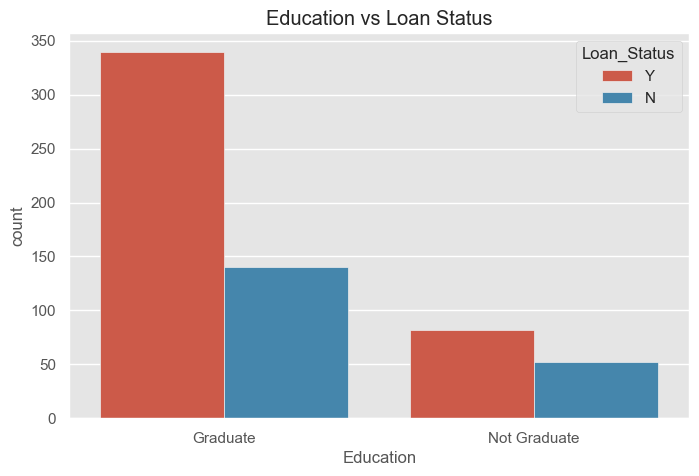

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Education', hue='Loan_Status', data=train_data)
plt.title("Education vs Loan Status")
plt.show()

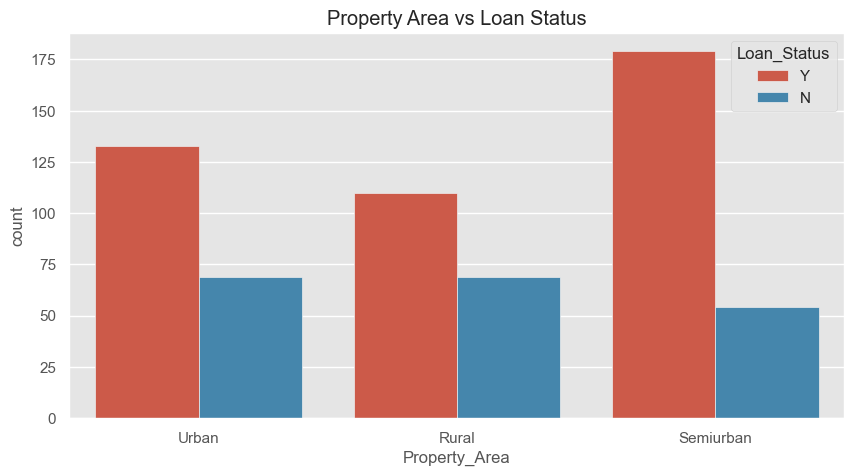

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=train_data)
plt.title("Property Area vs Loan Status")
plt.show()

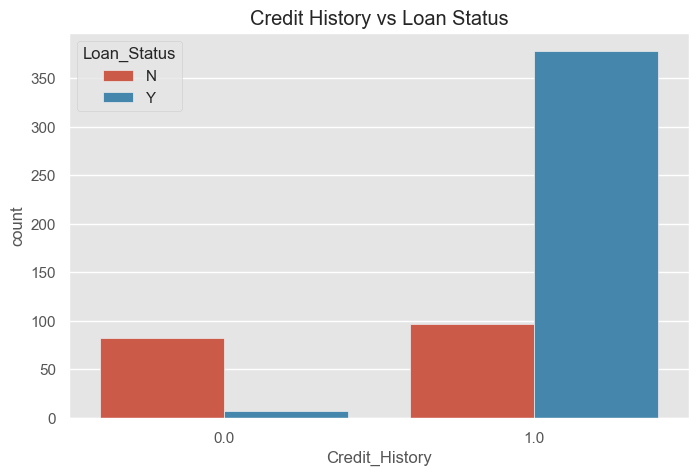

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Credit_History', hue='Loan_Status', data=train_data)
plt.title("Credit History vs Loan Status")
plt.show()

 let's look at the correlation matrix to understand the relationships between numerical features, particularly how they relate to the target variable.

In [16]:
print("Data Types of Columns:")
print(train_data.dtypes)
non_numeric_cols = train_data.select_dtypes(exclude=[np.number]).columns
print("Non-Numeric Columns:")
print(non_numeric_cols)

Data Types of Columns:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object
Non-Numeric Columns:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')


non-numeric columns, we can choose to drop them (if they are not useful for correlation) or convert categorical columns to numerical values using encoding.

In [17]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables using Label Encoding for binary categories
label_encoder = LabelEncoder()
for col in categorical_cols:
    train_data[col] = label_encoder.fit_transform(train_data[col].astype(str))

# Now, let's attempt to calculate the correlation matrix again
correlation_matrix = train_data.corr()

After encoding the categorical features, we can now compute the correlation matrix without errors:

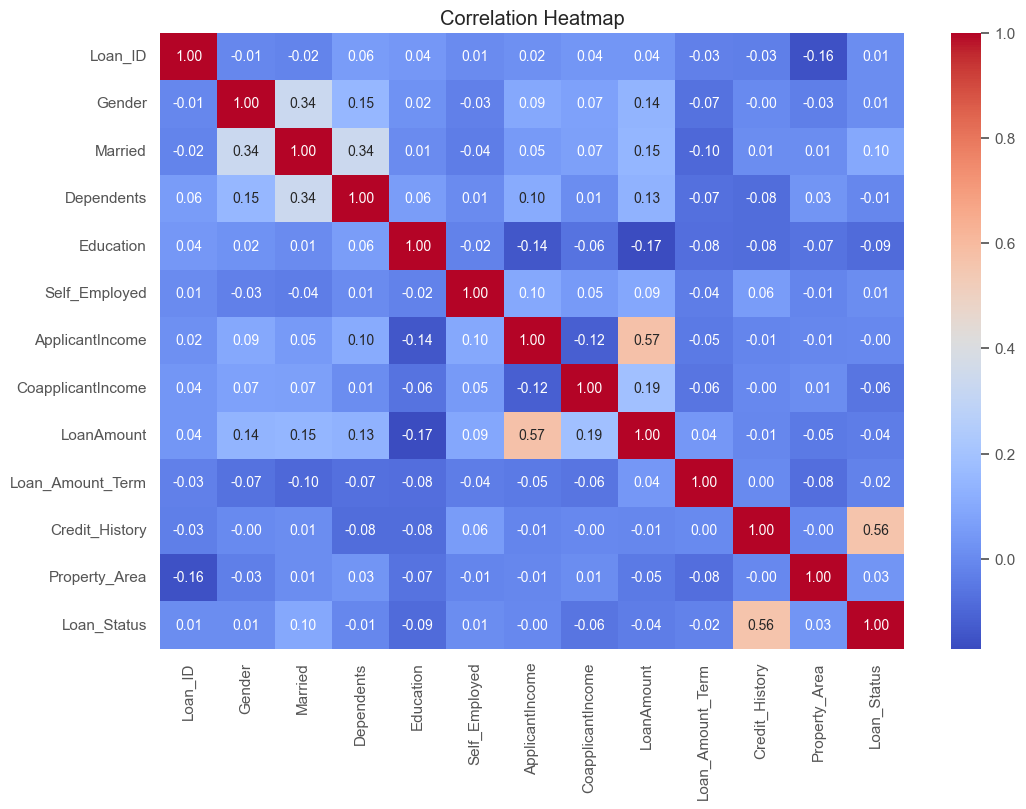

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

we'll check for missing values in the training data and decide on an approach to handle them (imputation, removal, etc.).

In [19]:
missing_values = train_data.isnull().sum()
print("Missing Values in Training Data:")
print(missing_values[missing_values > 0])

Missing Values in Training Data:
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64


#### -Mean/Median/Mode Imputation: For numerical columns.
#### -Most Frequent/Mode Imputation: For categorical columns.

In [20]:
for col in numerical_cols:
    train_data[col].fillna(train_data[col].median(), inplace=True)

# For categorical columns, fill with the mode (most frequent value)
for col in categorical_cols:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)

# Check if there are still missing values
print("Missing Values After Imputation:")
print(train_data.isnull().sum().sum())

Missing Values After Imputation:
0


Since we have already encoded binary categorical variables, if there are remaining multi-class categorical variables, you might want to use one-hot encoding....

In [21]:
train_data = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)

In [22]:
print("Training Data After Encoding:")
print(train_data.head())

Training Data After Encoding:
   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Loan_ID_1  Loan_ID_2  Loan_ID_3  Loan_ID_4  Loan_ID_5  ...  \
0             1.0      False      False      False      False      False  ...   
1             1.0       True      False      False      False      False  ...   
2             1.0      False       True      False      False      False  ...   
3             1.0      False      False       True      False      False  ...   
4             1.0      False      False      False       True      False  ...   

   Dependents_1  Dependents_2  Dependents_3  Dependents_

#### Scaling is important if we’re going to use algorithms sensitive to the scale of the data (e.g., KNN, SVM).

In [23]:
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()
train_data[numerical_cols] = scaler.fit_transform(train_data[numerical_cols])
print("Training Data After Scaling:")
print(train_data.head())

Training Data After Scaling:
   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.072991          -0.554487   -0.211241          0.273231   
1        -0.134412          -0.038732   -0.211241          0.273231   
2        -0.393747          -0.554487   -0.948996          0.273231   
3        -0.462062           0.251980   -0.306435          0.273231   
4         0.097728          -0.554487   -0.056551          0.273231   

   Credit_History  Loan_ID_1  Loan_ID_2  Loan_ID_3  Loan_ID_4  Loan_ID_5  ...  \
0        0.411733      False      False      False      False      False  ...   
1        0.411733       True      False      False      False      False  ...   
2        0.411733      False       True      False      False      False  ...   
3        0.411733      False      False       True      False      False  ...   
4        0.411733      False      False      False       True      False  ...   

   Dependents_1  Dependents_2  Dependents_3  Dependents_4

The error we're encountering, **KeyError: "['Loan_Status'] not found in axis,"** indicates that the column **'Loan_Status'** does not exist in our `train_data` DataFrame. This could happen for different reason ....

1. **Column Name Change**: The column might have been renamed during the encoding process or may not have been present in the first place.
2. **Encoding or Dropping**: If we encoded the **Loan_Status** column and dropped the original column, it will not be available anymore.

In [24]:
print("Columns in Training Data:")
print(train_data.columns)

Columns in Training Data:
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_ID_1', 'Loan_ID_2',
       'Loan_ID_3', 'Loan_ID_4', 'Loan_ID_5',
       ...
       'Dependents_1', 'Dependents_2', 'Dependents_3', 'Dependents_4',
       'Education_1', 'Self_Employed_1', 'Self_Employed_2', 'Property_Area_1',
       'Property_Area_2', 'Loan_Status_1'],
      dtype='object', length=632)


In [25]:
from sklearn.model_selection import train_test_split
y = train_data['Loan_Status_1']  # Target variable
X = train_data.drop('Loan_Status_1', axis=1)  # Features
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

Training set shape: (491, 631) (491,)
Validation set shape: (123, 631) (123,)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_val, y_pred))

Accuracy: 0.79
              precision    recall  f1-score   support

       False       0.95      0.42      0.58        43
        True       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [28]:
def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_val)  
    accuracy = accuracy_score(y_val, y_pred)  
    print(f"Accuracy of {model.__class__.__name__}: {accuracy:.2f}")
    print(classification_report(y_val, y_pred))  # Detailed report

now we can evaluate each train model

In [29]:
logistic_model = LogisticRegression(max_iter=1000)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)

In [30]:
print("Logistic Regression Model:")
evaluate_model(logistic_model, X_train, y_train, X_val, y_val)

print("Decision Tree Model:")
evaluate_model(decision_tree_model, X_train, y_train, X_val, y_val)

print("Random Forest Model:")
evaluate_model(random_forest_model, X_train, y_train, X_val, y_val)

print("Support Vector Machine Model:")
evaluate_model(svm_model, X_train, y_train, X_val, y_val)

Logistic Regression Model:
Accuracy of LogisticRegression: 0.79
              precision    recall  f1-score   support

       False       0.95      0.42      0.58        43
        True       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Decision Tree Model:
Accuracy of DecisionTreeClassifier: 0.68
              precision    recall  f1-score   support

       False       0.56      0.42      0.48        43
        True       0.73      0.82      0.77        80

    accuracy                           0.68       123
   macro avg       0.64      0.62      0.63       123
weighted avg       0.67      0.68      0.67       123

Random Forest Model:
Accuracy of RandomForestClassifier: 0.78
              precision    recall  f1-score   support

       False       0.90      0.42      0.57        43
        True       0.76      0.97      0.85      

If we find that one of the models performs significantly better than the others, we might want to tune its hyperparameters to enhance performance. For instance, we can use GridSearchCV or RandomizedSearchCV for this purpose.

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

# Initializing GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.81


In [32]:
# Assuming the best model is RandomForestClassifier with tuned parameters
best_model = grid_search.best_estimator_
best_model.fit(X, y)
import joblib
joblib.dump(best_model, 'final_model.pkl')

['final_model.pkl']

#### Model Evaluation

In [33]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [36]:
imputer = SimpleImputer(strategy='median')
test_data['LoanAmount'] = imputer.fit_transform(test_data[['LoanAmount']])
test_data['Loan_Amount_Term'] = imputer.fit_transform(test_data[['Loan_Amount_Term']])
test_data['Credit_History'] = imputer.fit_transform(test_data[['Credit_History']])

 One-hot encoding categorical features (apply the same encoding as done in the training set)

In [37]:
test_data = pd.get_dummies(test_data, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'])

In [39]:
training_data_columns = list(train_data.columns)  # Assuming train_data is your preprocessed training set
joblib.dump(training_data_columns, 'training_columns.pkl')

['training_columns.pkl']

In [40]:
training_data_columns = joblib.load('training_columns.pkl')  # Assume this file contains the training columns
missing_cols = set(training_data_columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0

In [46]:
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median(), inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].median(), inplace=True)

In [47]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [48]:
scaler = StandardScaler()
scaler.fit(train_data[numerical_columns])

# Save the scaler to a file
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [49]:
scaler = joblib.load('scaler.pkl')
test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])

In [50]:
scaler = joblib.load('scaler.pkl')
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])

In [56]:
test_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_1,Loan_ID_2,Loan_ID_3,Loan_ID_4,Loan_ID_5,...,Dependents_1,Dependents_2,Dependents_3,Dependents_4,Education_1,Self_Employed_1,Self_Employed_2,Property_Area_1,Property_Area_2,Loan_Status_1
0,5720.0,-1.215098e-16,110.0,360.0,1.0,0,0,0,0,0,...,False,False,0,0,0,0,0,0,0,0
1,3076.0,1.500000e+03,126.0,360.0,1.0,0,0,0,0,0,...,True,False,0,0,0,0,0,0,0,0
2,5000.0,1.800000e+03,208.0,360.0,1.0,0,0,0,0,0,...,False,True,0,0,0,0,0,0,0,0
3,2340.0,2.546000e+03,100.0,360.0,1.0,0,0,0,0,0,...,False,True,0,0,0,0,0,0,0,0
4,3276.0,-1.215098e-16,78.0,360.0,1.0,0,0,0,0,0,...,False,False,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009.0,1.777000e+03,113.0,360.0,1.0,0,0,0,0,0,...,False,False,0,0,0,0,0,0,0,0
363,4158.0,7.090000e+02,115.0,360.0,1.0,0,0,0,0,0,...,False,False,0,0,0,0,0,0,0,0
364,3250.0,1.993000e+03,126.0,360.0,1.0,0,0,0,0,0,...,False,False,0,0,0,0,0,0,0,0
365,5000.0,2.393000e+03,158.0,360.0,1.0,0,0,0,0,0,...,False,False,0,0,0,0,0,0,0,0


In [60]:
# Assuming 'Loan_Status' is the target variable
train_data = pd.read_csv(r'C:\Users\abhis\Documents\GitHub\walmart sales forecasting\Loan-approval-prediction-\loan approval dataset\train_u6lujuX_CVtuZ9i.csv')  # Load your training data
X_train = train_data.drop(columns=['Loan_Status'])  # Drop the target variable
training_columns = X_train.columns.tolist()  # Get the feature columns
print("Training Columns:", training_columns)

Training Columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']


In [62]:
# Load the test data
test_data = pd.read_csv(r'C:\Users\abhis\Documents\GitHub\walmart sales forecasting\Loan-approval-prediction-\loan approval dataset\test_Y3wMUE5_7gLdaTN.csv')  # Replace with your test data file

# Print columns to check for discrepancies
print("Training Columns:", training_columns)
print("Test Data Columns:", test_data.columns.tolist())

Training Columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
Test Data Columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']


In [64]:
# Define training_columns based on your training data features
training_columns = train_data.columns.tolist()
print("Training Columns:", training_columns)
print("Test Data Columns:", test_data.columns.tolist())

Training Columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
Test Data Columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']


In [65]:
# Fill missing values in numeric columns with mean
numeric_cols = test_data.select_dtypes(include=['float64', 'int64']).columns
test_data[numeric_cols] = test_data[numeric_cols].fillna(test_data[numeric_cols].mean())

# Fill missing values in categorical columns with mode
categorical_cols = test_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)

# Check for any remaining missing values
print("Missing values in test data after filling:")
print(test_data.isnull().sum())

Missing values in test data after filling:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [66]:
model = joblib.load('final_model.pkl')
scaler = joblib.load('scaler.pkl')
training_columns = joblib.load('training_columns.pkl')

In [67]:
test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(), inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].median(), inplace=True)
test_data['Credit_History'].fillna(1.0, inplace=True)